# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

Added this line for test

In [2]:
# force Pandas to show all rows of features dataframe
pd.options.display.max_rows = 1000

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [3]:
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

In [4]:
azdias.head(n=5)

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
4        -1                     3          1            5.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3                  4              2                 5               2   
4                  4              3                 4               1   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  ...  PLZ8_ANTG1  PLZ8_ANTG2  \
0                      5                 3  ...         NaN         NaN   
1                      4                 5  ...         2.0         3.0   
2                      3                 5  ...         3.0         3.0   
3                      1                 2  ...         2.0         2.0   
4                      3                 2  ...         2.0         4.0   

   PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  \
0         NaN         NaN          NaN       NaN       NaN     NaN   
1         2.0         1.0          1.0       5.0       4.0     3.0   
2         1.0         0.0          1.0       4.0       4.0     3.0   
3         2.0         0.0          1.0       3.0       4.0     2.0   
4         2.0         1.0          2.0       3.0       3.0     4.0   

   ORTSGR_KLS9  RELAT_AB  
0          NaN       NaN  
1          5.0       4.0  
2          5.0       2.0  
3          3.0       3.0  
4          6.0       5.0  

[5 rows x 85 columns]

Dataset has 85 columns 

In [5]:
azdias.columns

Index(['AGER_TYP', 'ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GEBURTSJAHR', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN',
       'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE',
       'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT',
       'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT',
       'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'TITEL_KZ', 'VERS_TYP', 'ZABEOTYP',
       'ALTER_HH', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE',
       'KK_KUNDENTYP', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_

In [6]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

Data frame has 891221 entries. Several of the columns have null values.

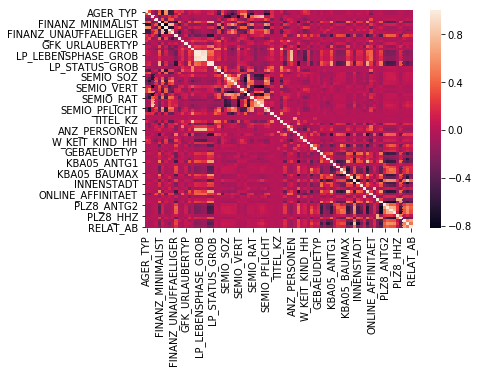

In [7]:
sns.heatmap(azdias.corr())

In [8]:
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

In [9]:
feat_info

attribute information_level         type missing_or_unknown
0                AGER_TYP            person  categorical             [-1,0]
1    ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2               ANREDE_KZ            person  categorical             [-1,0]
3           CJT_GESAMTTYP            person  categorical                [0]
4       FINANZ_MINIMALIST            person      ordinal               [-1]
5           FINANZ_SPARER            person      ordinal               [-1]
6        FINANZ_VORSORGER            person      ordinal               [-1]
7          FINANZ_ANLEGER            person      ordinal               [-1]
8   FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]
9        FINANZ_HAUSBAUER            person      ordinal               [-1]
10              FINANZTYP            person  categorical               [-1]
11            GEBURTSJAHR            person      numeric                [0]
12        GFK_URLAUBERTYP            person  categorical                 []
13       GREEN_AVANTGARDE            person  categorical                 []
14             HEALTH_TYP            person      ordinal             [-1,0]
15    LP_LEBENSPHASE_FEIN            person        mixed                [0]
16    LP_LEBENSPHASE_GROB            person        mixed                [0]
17        LP_FAMILIE_FEIN            person  categorical                [0]
18        LP_FAMILIE_GROB            person  categorical                [0]
19         LP_STATUS_FEIN            person  categorical                [0]
20         LP_STATUS_GROB            person  categorical                [0]
21       NATIONALITAET_KZ            person  categorical             [-1,0]
22  PRAEGENDE_JUGENDJAHRE            person        mixed             [-1,0]
23         RETOURTYP_BK_S            person      ordinal                [0]
24              SEMIO_SOZ            person      ordinal             [-1,9]
25              SEMIO_FAM            person      ordinal             [-1,9]
26              SEMIO_REL            person      ordinal             [-1,9]
27              SEMIO_MAT            person      ordinal             [-1,9]
28             SEMIO_VERT            person      ordinal             [-1,9]
29             SEMIO_LUST            person      ordinal             [-1,9]
30              SEMIO_ERL            person      ordinal             [-1,9]
31             SEMIO_KULT            person      ordinal             [-1,9]
32              SEMIO_RAT            person      ordinal             [-1,9]
33             SEMIO_KRIT            person      ordinal             [-1,9]
34              SEMIO_DOM            person      ordinal             [-1,9]
35             SEMIO_KAEM            person      ordinal             [-1,9]
36          SEMIO_PFLICHT            person      ordinal             [-1,9]
37            SEMIO_TRADV            person      ordinal             [-1,9]
38            SHOPPER_TYP            person  categorical               [-1]
39                SOHO_KZ            person  categorical               [-1]
40               TITEL_KZ            person  categorical             [-1,0]
41               VERS_TYP            person  categorical               [-1]
42               ZABEOTYP            person  categorical             [-1,9]
43               ALTER_HH         household     interval                [0]
44           ANZ_PERSONEN         household      numeric                 []
45              ANZ_TITEL         household      numeric                 []
46     HH_EINKOMMEN_SCORE         household      ordinal             [-1,0]
47           KK_KUNDENTYP         household  categorical               [-1]
48         W_KEIT_KIND_HH         household      ordinal             [-1,0]
49         WOHNDAUER_2008         household      ordinal             [-1,0]
50    ANZ_HAUSHALTE_AKTIV          building      numeric                [0]
51           ANZ_HH_TITEL          building      numeric        

The lists in column 'missing_or_unknown' were encoded as strings. They must first be converted to a list.

In [10]:
feat_info['missing_codes'] = feat_info['missing_or_unknown'].apply(lambda x: x[1:-1].split(',')).values

In [11]:
#feat_info.loc[57,'missing_codes'][1] = '0' # entry 57 from ['-1','X'] to ['-1','0']

In [12]:
#feat_info.loc[58,'missing_codes'][0] = '0' # entry 58 from ['XX'] to ['0']

In [13]:
#feat_info.loc[59,'missing_codes'][1] = '0' # entry 59 from ['-1','XX'] to ['-1','0']

In [14]:
feat_info['missing_codes']

0        [-1, 0]
1     [-1, 0, 9]
2        [-1, 0]
3            [0]
4           [-1]
5           [-1]
6           [-1]
7           [-1]
8           [-1]
9           [-1]
10          [-1]
11           [0]
12            []
13            []
14       [-1, 0]
15           [0]
16           [0]
17           [0]
18           [0]
19           [0]
20           [0]
21       [-1, 0]
22       [-1, 0]
23           [0]
24       [-1, 9]
25       [-1, 9]
26       [-1, 9]
27       [-1, 9]
28       [-1, 9]
29       [-1, 9]
30       [-1, 9]
31       [-1, 9]
32       [-1, 9]
33       [-1, 9]
34       [-1, 9]
35       [-1, 9]
36       [-1, 9]
37       [-1, 9]
38          [-1]
39          [-1]
40       [-1, 0]
41          [-1]
42       [-1, 9]
43           [0]
44            []
45            []
46       [-1, 0]
47          [-1]
48       [-1, 0]
49       [-1, 0]
50           [0]
51            []
52       [-1, 0]
53            []
54           [0]
55          [-1]
56          [-1]
57       [-1, X]
58          [X

In [15]:
#azdias.apply(lambda x: 'XX' in x)

In [59]:
i = azdias.columns[58]
feat_info[feat_info['attribute']==i]
for x in feat_info[feat_info['attribute']==i]['missing_codes'].values[0]:
        print(azdias[azdias[i]==x]['CAMEO_DEU_2015'].count())

373


In [67]:
(azdias['AGER_TYP']==-1).sum()

677503

In [68]:
(azdias['AGER_TYP']==0).sum()

8340

In [69]:
i = azdias.columns[0]
feat_info[feat_info['attribute']==i]
for x in feat_info[feat_info['attribute']==i]['missing_codes'].values[0]:
    try:
        print(azdias[azdias[i]==int(x)][i].count())
    except:
        print(azdias[str(azdias[i])==x][i])
        

677503
8340


In [74]:
i = azdias.columns[58]
feat_info[feat_info['attribute']==i]
for x in feat_info[feat_info['attribute']==i]['missing_codes'].values[0]:
    try:
        a = azdias[azdias[i]==int(x)][i].count()
    except:
        a = azdias[azdias[i]==x][i].count()
        
    print(a)

373


In [76]:
i = azdias.columns[12]
feat_info[feat_info['attribute']==i]
for x in feat_info[feat_info['attribute']==i]['missing_codes'].values[0]:
    try:
        a = azdias[azdias[i]==int(x)][i].count()
    except:
        a = azdias[azdias[i]==x][i].count()
        
    print(a)

0


In [96]:
def set_nan(df):
    num_missing=[]

    for i in df.columns:
        a = 0
        for x in feat_info[feat_info['attribute']==i]['missing_codes'].values[0]:
            try:
                a += df[df[i]==int(x)][i].count()
                df.loc[df[i]==int(x),i] = np.nan
            except:
                a += df[df[i]==x][i].count()
                df.loc[df[i]==x,i] = np.nan
        
        num_missing.append(a)

    return num_missing

In [97]:
df = azdias.copy()
num_missing = set_nan(df)

In [98]:
len(num_missing)

85

In [99]:
feat_info['num_missing'] = num_missing

In [100]:
feat_info

attribute information_level         type missing_or_unknown  \
0                AGER_TYP            person  categorical             [-1,0]   
1    ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]   
2               ANREDE_KZ            person  categorical             [-1,0]   
3           CJT_GESAMTTYP            person  categorical                [0]   
4       FINANZ_MINIMALIST            person      ordinal               [-1]   
5           FINANZ_SPARER            person      ordinal               [-1]   
6        FINANZ_VORSORGER            person      ordinal               [-1]   
7          FINANZ_ANLEGER            person      ordinal               [-1]   
8   FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]   
9        FINANZ_HAUSBAUER            person      ordinal               [-1]   
10              FINANZTYP            person  categorical               [-1]   
11            GEBURTSJAHR            person      numeric                [0]   
12        GFK_URLAUBERTYP            person  categorical                 []   
13       GREEN_AVANTGARDE            person  categorical                 []   
14             HEALTH_TYP            person      ordinal             [-1,0]   
15    LP_LEBENSPHASE_FEIN            person        mixed                [0]   
16    LP_LEBENSPHASE_GROB            person        mixed                [0]   
17        LP_FAMILIE_FEIN            person  categorical                [0]   
18        LP_FAMILIE_GROB            person  categorical                [0]   
19         LP_STATUS_FEIN            person  categorical                [0]   
20         LP_STATUS_GROB            person  categorical                [0]   
21       NATIONALITAET_KZ            person  categorical             [-1,0]   
22  PRAEGENDE_JUGENDJAHRE            person        mixed             [-1,0]   
23         RETOURTYP_BK_S            person      ordinal                [0]   
24              SEMIO_SOZ            person      ordinal             [-1,9]   
25              SEMIO_FAM            person      ordinal             [-1,9]   
26              SEMIO_REL            person      ordinal             [-1,9]   
27              SEMIO_MAT            person      ordinal             [-1,9]   
28             SEMIO_VERT            person      ordinal             [-1,9]   
29             SEMIO_LUST            person      ordinal             [-1,9]   
30              SEMIO_ERL            person      ordinal             [-1,9]   
31             SEMIO_KULT            person      ordinal             [-1,9]   
32              SEMIO_RAT            person      ordinal             [-1,9]   
33             SEMIO_KRIT            person      ordinal             [-1,9]   
34              SEMIO_DOM            person      ordinal             [-1,9]   
35             SEMIO_KAEM            person      ordinal             [-1,9]   
36          SEMIO_PFLICHT            person      ordinal             [-1,9]   
37            SEMIO_TRADV            person      ordinal             [-1,9]   
38            SHOPPER_TYP            person  categorical               [-1]   
39                SOHO_KZ            person  categorical               [-1]   
40               TITEL_KZ            person  categorical             [-1,0]   
41               VERS_TYP            person  categorical               [-1]   
42               ZABEOTYP            person  categorical             [-1,9]   
43               ALTER_HH         household     interval                [0]   
44           ANZ_PERSONEN         household      numeric                 []   
45              ANZ_TITEL         household      numeric                 []   
46     HH_EINKOMMEN_SCORE         household      ordinal             [-1,0]   
47           KK_KUNDENTYP         household  categorical               [-1]   
48         W_KEIT_KIND_HH         household      ordinal             [-1,0]   
49         WOHNDAUER_2008         household      ordinal          

In [87]:
(df.iloc[:,58]=='XX').values.any()

False

In [42]:
i = azdias.columns[12]
feat_info[feat_info['attribute']==i]
for x in feat_info[feat_info['attribute']==i]['missing_codes'].values[0]:
    print(type(x))
    if not x:
        print('ping')
        print(azdias[azdias[i]==x]['GFK_URLAUBERTYP'].count())

<class 'str'>
ping
0


In [47]:
num_missing=[]
for i in azdias.columns:
    b=0
    for x in feat_info[feat_info['attribute']==i]['missing_codes'].values[0]:
        print(x)
        b = azdias[azdias[i]==x].count()
        print(x, b)
#        azdias.loc[azdias[i].astype(str)==x,i] = np.nan
#    num_missing.append(b)

-1
-1 AGER_TYP                 0
ALTERSKATEGORIE_GROB     0
ANREDE_KZ                0
CJT_GESAMTTYP            0
FINANZ_MINIMALIST        0
FINANZ_SPARER            0
FINANZ_VORSORGER         0
FINANZ_ANLEGER           0
FINANZ_UNAUFFAELLIGER    0
FINANZ_HAUSBAUER         0
FINANZTYP                0
GEBURTSJAHR              0
GFK_URLAUBERTYP          0
GREEN_AVANTGARDE         0
HEALTH_TYP               0
LP_LEBENSPHASE_FEIN      0
LP_LEBENSPHASE_GROB      0
LP_FAMILIE_FEIN          0
LP_FAMILIE_GROB          0
LP_STATUS_FEIN           0
LP_STATUS_GROB           0
NATIONALITAET_KZ         0
PRAEGENDE_JUGENDJAHRE    0
RETOURTYP_BK_S           0
SEMIO_SOZ                0
SEMIO_FAM                0
SEMIO_REL                0
SEMIO_MAT                0
SEMIO_VERT               0
SEMIO_LUST               0
SEMIO_ERL                0
SEMIO_KULT               0
SEMIO_RAT                0
SEMIO_KRIT               0
SEMIO_DOM                0
SEMIO_KAEM               0
SEMIO_PFLICHT         

0 AGER_TYP                 0
ALTERSKATEGORIE_GROB     0
ANREDE_KZ                0
CJT_GESAMTTYP            0
FINANZ_MINIMALIST        0
FINANZ_SPARER            0
FINANZ_VORSORGER         0
FINANZ_ANLEGER           0
FINANZ_UNAUFFAELLIGER    0
FINANZ_HAUSBAUER         0
FINANZTYP                0
GEBURTSJAHR              0
GFK_URLAUBERTYP          0
GREEN_AVANTGARDE         0
HEALTH_TYP               0
LP_LEBENSPHASE_FEIN      0
LP_LEBENSPHASE_GROB      0
LP_FAMILIE_FEIN          0
LP_FAMILIE_GROB          0
LP_STATUS_FEIN           0
LP_STATUS_GROB           0
NATIONALITAET_KZ         0
PRAEGENDE_JUGENDJAHRE    0
RETOURTYP_BK_S           0
SEMIO_SOZ                0
SEMIO_FAM                0
SEMIO_REL                0
SEMIO_MAT                0
SEMIO_VERT               0
SEMIO_LUST               0
SEMIO_ERL                0
SEMIO_KULT               0
SEMIO_RAT                0
SEMIO_KRIT               0
SEMIO_DOM                0
SEMIO_KAEM               0
SEMIO_PFLICHT            0

XX AGER_TYP                 373
ALTERSKATEGORIE_GROB     373
ANREDE_KZ                373
CJT_GESAMTTYP            369
FINANZ_MINIMALIST        373
FINANZ_SPARER            373
FINANZ_VORSORGER         373
FINANZ_ANLEGER           373
FINANZ_UNAUFFAELLIGER    373
FINANZ_HAUSBAUER         373
FINANZTYP                373
GEBURTSJAHR              373
GFK_URLAUBERTYP          369
GREEN_AVANTGARDE         373
HEALTH_TYP               373
LP_LEBENSPHASE_FEIN      369
LP_LEBENSPHASE_GROB      369
LP_FAMILIE_FEIN          369
LP_FAMILIE_GROB          369
LP_STATUS_FEIN           369
LP_STATUS_GROB           369
NATIONALITAET_KZ         373
PRAEGENDE_JUGENDJAHRE    373
RETOURTYP_BK_S           369
SEMIO_SOZ                373
SEMIO_FAM                373
SEMIO_REL                373
SEMIO_MAT                373
SEMIO_VERT               373
SEMIO_LUST               373
SEMIO_ERL                373
SEMIO_KULT               373
SEMIO_RAT                373
SEMIO_KRIT               373
SEMIO_DOM  

In [120]:
a = feat_info[(feat_info['type']!='numeric')]['attribute'].to_list()

In [ ]:
i = azdias.columns[0]
for x in feat_info[feat_info['attribute']==i]['missing_codes'].values[0]:
    print(azdias.iloc[0,0].astype(int).astype(str)== x)

In [12]:
azdias.dtypes

AGER_TYP                   int64
ALTERSKATEGORIE_GROB       int64
ANREDE_KZ                  int64
CJT_GESAMTTYP            float64
FINANZ_MINIMALIST          int64
FINANZ_SPARER              int64
FINANZ_VORSORGER           int64
FINANZ_ANLEGER             int64
FINANZ_UNAUFFAELLIGER      int64
FINANZ_HAUSBAUER           int64
FINANZTYP                  int64
GEBURTSJAHR                int64
GFK_URLAUBERTYP          float64
GREEN_AVANTGARDE           int64
HEALTH_TYP                 int64
LP_LEBENSPHASE_FEIN      float64
LP_LEBENSPHASE_GROB      float64
LP_FAMILIE_FEIN          float64
LP_FAMILIE_GROB          float64
LP_STATUS_FEIN           float64
LP_STATUS_GROB           float64
NATIONALITAET_KZ           int64
PRAEGENDE_JUGENDJAHRE      int64
RETOURTYP_BK_S           float64
SEMIO_SOZ                  int64
SEMIO_FAM                  int64
SEMIO_REL                  int64
SEMIO_MAT                  int64
SEMIO_VERT                 int64
SEMIO_LUST                 int64
SEMIO_ERL 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

Given the missing or unknown list in feat_info, we defined a function to process the missing values for all categories and replace them with Nan.

In [135]:
from ast import literal_eval

In [133]:
def set_nan(df):

    num_missing=[]
    for i in df.columns:
        occ = 0
        for x in feat_info[feat_info['attribute']==i]['missing_codes'].values[0]:
            print(x)
            x2 = float(x)
            print(x2)
            occ += (df[i].astype(str)==x2).sum()
            df.loc[df[i].astype(str)==x2,i] = np.nan
        num_missing.append(occ)
        
    return num_missing

In [134]:
num_missing = set_nan(azdias)
feat_info['num_missing'] = num_missing

-1
-1.0
0
0.0
-1
-1.0
0
0.0
9
9.0
-1
-1.0
0
0.0
0
0.0
-1
-1.0
-1
-1.0
-1
-1.0
-1
-1.0
-1
-1.0
-1
-1.0
-1
-1.0
0
0.0



ValueError: could not convert string to float: 

In [68]:
azdias

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0           -1.0                   2.0        1.0            2.0   
1           -1.0                   1.0        2.0            5.0   
2           -1.0                   3.0        2.0            3.0   
3            2.0                   4.0        2.0            2.0   
4           -1.0                   3.0        1.0            5.0   
5            3.0                   1.0        2.0            2.0   
6           -1.0                   2.0        2.0            5.0   
7           -1.0                   1.0        1.0            3.0   
8           -1.0                   3.0        1.0            3.0   
9           -1.0                   3.0        2.0            4.0   
10           NaN                   3.0        2.0            1.0   
11          -1.0                   2.0        1.0            6.0   
12          -1.0                   3.0        1.0            6.0   
13          -1.0                   1.0        2.0            5.0   
14          -1.0                   3.0        1.0            6.0   
15           1.0                   4.0        2.0            4.0   
16          -1.0                   1.0        2.0            1.0   
17          -1.0                   2.0        1.0            6.0   
18          -1.0                   2.0        2.0            6.0   
19          -1.0                   3.0        1.0            3.0   
20          -1.0                   2.0        2.0            4.0   
21          -1.0                   2.0        1.0            3.0   
22          -1.0                   1.0        1.0            4.0   
23          -1.0                   3.0        1.0            3.0   
24          -1.0                   3.0        2.0            6.0   
25          -1.0                   1.0        1.0            3.0   
26          -1.0                   3.0        1.0            3.0   
27          -1.0                   3.0        1.0            4.0   
28          -1.0                   3.0        1.0            2.0   
29           2.0                   4.0        2.0            1.0   
30          -1.0                   3.0        2.0            3.0   
31          -1.0                   2.0        2.0            6.0   
32          -1.0                   1.0        1.0            4.0   
33          -1.0                   2.0        2.0            4.0   
34           3.0                   1.0        2.0            2.0   
35          -1.0                   2.0        2.0            2.0   
36          -1.0                   3.0        2.0            2.0   
37           2.0                   4.0        1.0            2.0   
38          -1.0                   2.0        2.0            6.0   
39          -1.0                   4.0        1.0            4.0   
40          -1.0                   4.0        2.0            1.0   
41          -1.0                   1.0        2.0            3.0   
42          -1.0                   1.0        2.0            5.0   
43          -1.0                   1.0        2.0            4.0   
44          -1.0                   3.0        2.0            4.0   
45           1.0                   4.0        2.0            2.0   
46          -1.0                   NaN        2.0            3.0   
47           2.0                   4.0        2.0            2.0   
48          -1.0                   3.0        2.0            6.0   
49          -1.0                   2.0        1.0            6.0   
50          -1.0                   3.0        1.0            6.0   
51          -1.0                   1.0        1.0            5.0   
52          -1.0                   1.0        2.0            1.0   
53          -1.0                   2.0        1.0            3.0   
54          -1.0                   3.0        1.0            6.0   
55          -1.0                   3.0        2.0            5.0   
56          -1.0                   2.0        1.0            2.0   
57          -1.0                   1.0        2.0            4.0

In [16]:
feat_info

attribute information_level         type missing_or_unknown  \
0                AGER_TYP            person  categorical             [-1,0]   
1    ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]   
2               ANREDE_KZ            person  categorical             [-1,0]   
3           CJT_GESAMTTYP            person  categorical                [0]   
4       FINANZ_MINIMALIST            person      ordinal               [-1]   
5           FINANZ_SPARER            person      ordinal               [-1]   
6        FINANZ_VORSORGER            person      ordinal               [-1]   
7          FINANZ_ANLEGER            person      ordinal               [-1]   
8   FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]   
9        FINANZ_HAUSBAUER            person      ordinal               [-1]   
10              FINANZTYP            person  categorical               [-1]   
11            GEBURTSJAHR            person      numeric                [0]   
12        GFK_URLAUBERTYP            person  categorical                 []   
13       GREEN_AVANTGARDE            person  categorical                 []   
14             HEALTH_TYP            person      ordinal             [-1,0]   
15    LP_LEBENSPHASE_FEIN            person        mixed                [0]   
16    LP_LEBENSPHASE_GROB            person        mixed                [0]   
17        LP_FAMILIE_FEIN            person  categorical                [0]   
18        LP_FAMILIE_GROB            person  categorical                [0]   
19         LP_STATUS_FEIN            person  categorical                [0]   
20         LP_STATUS_GROB            person  categorical                [0]   
21       NATIONALITAET_KZ            person  categorical             [-1,0]   
22  PRAEGENDE_JUGENDJAHRE            person        mixed             [-1,0]   
23         RETOURTYP_BK_S            person      ordinal                [0]   
24              SEMIO_SOZ            person      ordinal             [-1,9]   
25              SEMIO_FAM            person      ordinal             [-1,9]   
26              SEMIO_REL            person      ordinal             [-1,9]   
27              SEMIO_MAT            person      ordinal             [-1,9]   
28             SEMIO_VERT            person      ordinal             [-1,9]   
29             SEMIO_LUST            person      ordinal             [-1,9]   
30              SEMIO_ERL            person      ordinal             [-1,9]   
31             SEMIO_KULT            person      ordinal             [-1,9]   
32              SEMIO_RAT            person      ordinal             [-1,9]   
33             SEMIO_KRIT            person      ordinal             [-1,9]   
34              SEMIO_DOM            person      ordinal             [-1,9]   
35             SEMIO_KAEM            person      ordinal             [-1,9]   
36          SEMIO_PFLICHT            person      ordinal             [-1,9]   
37            SEMIO_TRADV            person      ordinal             [-1,9]   
38            SHOPPER_TYP            person  categorical               [-1]   
39                SOHO_KZ            person  categorical               [-1]   
40               TITEL_KZ            person  categorical             [-1,0]   
41               VERS_TYP            person  categorical               [-1]   
42               ZABEOTYP            person  categorical             [-1,9]   
43               ALTER_HH         household     interval                [0]   
44           ANZ_PERSONEN         household      numeric                 []   
45              ANZ_TITEL         household      numeric                 []   
46     HH_EINKOMMEN_SCORE         household      ordinal             [-1,0]   
47           KK_KUNDENTYP         household  categorical               [-1]   
48         W_KEIT_KIND_HH         household      ordinal             [-1,0]   
49         WOHNDAUER_2008         household      ordinal          

In [17]:
#azdias_num = feat_info[(feat_info['type']=='numeric') | (feat_info['type']=='ordinal')]['attribute']
azdias_num = azdias.select_dtypes(include=['float64','int64']).columns

In [18]:
#azdias_cat = feat_info[(feat_info['type']=='categorical') | (feat_info['type']=='mixed')]['attribute']
azdias_cat = azdias.select_dtypes(include='object').columns

In [20]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X = imputer.fit_transform(azdias[azdias_num])

In [21]:
azdias_tr = pd.DataFrame(X, columns = azdias[azdias_num].columns)

In [22]:
azdias_tr

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0           -1.0                   2.0        1.0            2.0   
1           -1.0                   1.0        2.0            5.0   
2           -1.0                   3.0        2.0            3.0   
3            2.0                   4.0        2.0            2.0   
4           -1.0                   3.0        1.0            5.0   
5            3.0                   1.0        2.0            2.0   
6           -1.0                   2.0        2.0            5.0   
7           -1.0                   1.0        1.0            3.0   
8           -1.0                   3.0        1.0            3.0   
9           -1.0                   3.0        2.0            4.0   
10          -1.0                   3.0        2.0            1.0   
11          -1.0                   2.0        1.0            6.0   
12          -1.0                   3.0        1.0            6.0   
13          -1.0                   1.0        2.0            5.0   
14          -1.0                   3.0        1.0            6.0   
15           1.0                   4.0        2.0            4.0   
16          -1.0                   1.0        2.0            1.0   
17          -1.0                   2.0        1.0            6.0   
18          -1.0                   2.0        2.0            6.0   
19          -1.0                   3.0        1.0            3.0   
20          -1.0                   2.0        2.0            4.0   
21          -1.0                   2.0        1.0            3.0   
22          -1.0                   1.0        1.0            4.0   
23          -1.0                   3.0        1.0            3.0   
24          -1.0                   3.0        2.0            6.0   
25          -1.0                   1.0        1.0            3.0   
26          -1.0                   3.0        1.0            3.0   
27          -1.0                   3.0        1.0            4.0   
28          -1.0                   3.0        1.0            2.0   
29           2.0                   4.0        2.0            1.0   
30          -1.0                   3.0        2.0            3.0   
31          -1.0                   2.0        2.0            6.0   
32          -1.0                   1.0        1.0            4.0   
33          -1.0                   2.0        2.0            4.0   
34           3.0                   1.0        2.0            2.0   
35          -1.0                   2.0        2.0            2.0   
36          -1.0                   3.0        2.0            2.0   
37           2.0                   4.0        1.0            2.0   
38          -1.0                   2.0        2.0            6.0   
39          -1.0                   4.0        1.0            4.0   
40          -1.0                   4.0        2.0            1.0   
41          -1.0                   1.0        2.0            3.0   
42          -1.0                   1.0        2.0            5.0   
43          -1.0                   1.0        2.0            4.0   
44          -1.0                   3.0        2.0            4.0   
45           1.0                   4.0        2.0            2.0   
46          -1.0                   3.0        2.0            3.0   
47           2.0                   4.0        2.0            2.0   
48          -1.0                   3.0        2.0            6.0   
49          -1.0                   2.0        1.0            6.0   
50          -1.0                   3.0        1.0            6.0   
51          -1.0                   1.0        1.0            5.0   
52          -1.0                   1.0        2.0            1.0   
53          -1.0                   2.0        1.0            3.0   
54          -1.0                   3.0        1.0            6.0   
55          -1.0                   3.0        2.0            5.0   
56          -1.0                   2.0        1.0            2.0   
57          -1.0                   1.0        2.0            4.0

In [32]:
azdias[azdias_cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 4 columns):
OST_WEST_KZ        798073 non-null object
CAMEO_DEUG_2015    791869 non-null object
CAMEO_DEU_2015     791869 non-null object
CAMEO_INTL_2015    791869 non-null object
dtypes: object(4)
memory usage: 27.2+ MB


In [33]:
azdias2 = azdias_tr.copy()

In [34]:
azdias2[azdias_cat] = azdias[azdias_cat]

In [38]:
azdias2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null float64
ALTERSKATEGORIE_GROB     891221 non-null float64
ANREDE_KZ                891221 non-null float64
CJT_GESAMTTYP            891221 non-null float64
FINANZ_MINIMALIST        891221 non-null float64
FINANZ_SPARER            891221 non-null float64
FINANZ_VORSORGER         891221 non-null float64
FINANZ_ANLEGER           891221 non-null float64
FINANZ_UNAUFFAELLIGER    891221 non-null float64
FINANZ_HAUSBAUER         891221 non-null float64
FINANZTYP                891221 non-null float64
GEBURTSJAHR              891221 non-null float64
GFK_URLAUBERTYP          891221 non-null float64
GREEN_AVANTGARDE         891221 non-null float64
HEALTH_TYP               891221 non-null float64
LP_LEBENSPHASE_FEIN      891221 non-null float64
LP_LEBENSPHASE_GROB      891221 non-null float64
LP_FAMILIE_FEIN          891221 non-null float64
LP_FAMI

In [39]:
azdias2.dropna(inplace=True)

In [40]:
azdias2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791869 entries, 1 to 891220
Data columns (total 85 columns):
AGER_TYP                 791869 non-null float64
ALTERSKATEGORIE_GROB     791869 non-null float64
ANREDE_KZ                791869 non-null float64
CJT_GESAMTTYP            791869 non-null float64
FINANZ_MINIMALIST        791869 non-null float64
FINANZ_SPARER            791869 non-null float64
FINANZ_VORSORGER         791869 non-null float64
FINANZ_ANLEGER           791869 non-null float64
FINANZ_UNAUFFAELLIGER    791869 non-null float64
FINANZ_HAUSBAUER         791869 non-null float64
FINANZTYP                791869 non-null float64
GEBURTSJAHR              791869 non-null float64
GFK_URLAUBERTYP          791869 non-null float64
GREEN_AVANTGARDE         791869 non-null float64
HEALTH_TYP               791869 non-null float64
LP_LEBENSPHASE_FEIN      791869 non-null float64
LP_LEBENSPHASE_GROB      791869 non-null float64
LP_FAMILIE_FEIN          791869 non-null float64
LP_FAMI

In [63]:
scaler = MinMaxScaler()
num_feat = feat_info.loc[feat_info['type']=='numeric','attribute'].to_list()
azdias_scaled = pd.DataFrame(data=azdias2)
azdias_scaled[num_feat] = scaler.fit_transform(azdias2[num_feat])

In [64]:
azdias_scaled

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
1           -1.0                   1.0        2.0            5.0   
2           -1.0                   3.0        2.0            3.0   
3            2.0                   4.0        2.0            2.0   
4           -1.0                   3.0        1.0            5.0   
5            3.0                   1.0        2.0            2.0   
6           -1.0                   2.0        2.0            5.0   
7           -1.0                   1.0        1.0            3.0   
8           -1.0                   3.0        1.0            3.0   
9           -1.0                   3.0        2.0            4.0   
10          -1.0                   3.0        2.0            1.0   
12          -1.0                   3.0        1.0            6.0   
13          -1.0                   1.0        2.0            5.0   
15           1.0                   4.0        2.0            4.0   
16          -1.0                   1.0        2.0            1.0   
18          -1.0                   2.0        2.0            6.0   
19          -1.0                   3.0        1.0            3.0   
20          -1.0                   2.0        2.0            4.0   
21          -1.0                   2.0        1.0            3.0   
22          -1.0                   1.0        1.0            4.0   
23          -1.0                   3.0        1.0            3.0   
25          -1.0                   1.0        1.0            3.0   
27          -1.0                   3.0        1.0            4.0   
28          -1.0                   3.0        1.0            2.0   
29           2.0                   4.0        2.0            1.0   
31          -1.0                   2.0        2.0            6.0   
32          -1.0                   1.0        1.0            4.0   
33          -1.0                   2.0        2.0            4.0   
34           3.0                   1.0        2.0            2.0   
36          -1.0                   3.0        2.0            2.0   
37           2.0                   4.0        1.0            2.0   
38          -1.0                   2.0        2.0            6.0   
41          -1.0                   1.0        2.0            3.0   
42          -1.0                   1.0        2.0            5.0   
43          -1.0                   1.0        2.0            4.0   
44          -1.0                   3.0        2.0            4.0   
45           1.0                   4.0        2.0            2.0   
47           2.0                   4.0        2.0            2.0   
49          -1.0                   2.0        1.0            6.0   
50          -1.0                   3.0        1.0            6.0   
51          -1.0                   1.0        1.0            5.0   
52          -1.0                   1.0        2.0            1.0   
55          -1.0                   3.0        2.0            5.0   
56          -1.0                   2.0        1.0            2.0   
57          -1.0                   1.0        2.0            4.0   
58          -1.0                   2.0        2.0            4.0   
59          -1.0                   2.0        1.0            4.0   
60           3.0                   2.0        1.0            6.0   
63          -1.0                   2.0        1.0            4.0   
64          -1.0                   2.0        2.0            6.0   
65          -1.0                   3.0        2.0            2.0   
66          -1.0                   2.0        1.0            5.0   
67           1.0                   3.0        1.0            3.0   
68           1.0                   4.0        2.0            5.0   
70          -1.0                   3.0        1.0            6.0   
71          -1.0                   3.0        2.0            1.0   
72          -1.0                   4.0        2.0            1.0   
73          -1.0                   3.0        2.0            4.0   
74          -1.0                   3.0        1.0            4.0

In [31]:
azdias[azdias_cat].isnull()

OST_WEST_KZ  CAMEO_DEUG_2015  CAMEO_DEU_2015  CAMEO_INTL_2015
0              True             True            True             True
1             False            False           False            False
2             False            False           False            False
3             False            False           False            False
4             False            False           False            False
5             False            False           False            False
6             False            False           False            False
7             False            False           False            False
8             False            False           False            False
9             False            False           False            False
10            False            False           False            False
11             True             True            True             True
12            False            False           False            False
13            False            False           False            False
14             True             True            True             True
15            False            False           False            False
16            False            False           False            False
17             True             True            True             True
18            False            False           False            False
19            False            False           False            False
20            False            False           False            False
21            False            False           False            False
22            False            False           False            False
23            False            False           False            False
24             True             True            True             True
25            False            False           False            False
26            False             True            True             True
27            False            False           False            False
28            False            False           False            False
29            False            False           False            False
30             True             True            True             True
31            False            False           False            False
32            False            False           False            False
33            False            False           False            False
34            False            False           False            False
35             True             True            True             True
36            False            False           False            False
37            False            False           False            False
38            False            False           False            False
39            False             True            True             True
40            False             True            True             True
41            False            False           False            False
42            False            False           False            False
43            False            False           False            False
44            False            False           False            False
45            False            False           False            False
46             True             True            True             True
47            False            False           False            False
48             True             True            True             True
49            False            False           False            False
50            False            False           False            False
51            False            False           False            False
52            False            False           False            False
53             True             True            True             True
54             True             True            True             True
55            False            False           False            False
56            Fals